Analysis of petco store locations in a jupyter notebook

what data you will use: use csv supplied. <br>
preprocessing: geocode address into lat long using geopy/nominatim <br>
figure 1: create a US map with store locations as markers, save it as PNG/JPG. Make it look nice. <br>
figure 2: draw a horizontal bar plot of state names with top 5 locations.<br>
put in one para describing total stores,  top states where it is found, and where it is not found

In [33]:
import pandas as pd
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import folium
from folium.plugins import FastMarkerCluster
import seaborn as sns
from geopy.extra.rate_limiter import RateLimiter
import io
from PIL import Image


In [34]:
#preprocessing

df=pd.read_csv('petco stores.csv')
def coordinates(i):
    return ''.join(i.split(',')[:-2])

df['Address_modif'] = [coordinates(i) for i in df['Address'] ]
locator = Nominatim(user_agent="myGeocoder")
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
df['location'] = df['Address_modif'].apply(geocode)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)
df = df[pd.notnull(df["latitude"])]

#visualisation
def plot_map(df):
    latitude = 37.0902
    longitude = -95.7129
    map1 = folium.Map(
        location=[latitude, longitude],
        tiles='OpenStreetMap',
        zoom_start=4,
    )

    for i in range(0,len(df)):

        folium.Marker(
          location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
          popup=df.iloc[i]['Store Name'],
       ).add_to(map1)

    # save map as image
    map1.save('map1.html')
    imgkit.from_file('map1.html', 'out.png')
    return map1

    
def plot1(df):
    count  = df['State'].value_counts().nlargest(5)
    plt.figure(figsize=(7,4))

    sns.barplot( x=count.values,y=count.index, orient='h').set_title('Top 5 states with ownig a pet store')
    plt.xlabel('No. of stores')
    plt.ylabel('State')
    plt.show() 
    
def plot2(df):
    print("********Pet stores in each state**********")
    for i in df['State'].value_counts().index:
        df_new=pd.DataFrame()
        df_new=df[df['State']==i]
        count  = df_new['Store Name'].value_counts()
        plt.figure(figsize=(7,2))
        sns.barplot( x=count.values,y=count.index, orient='h').set_title(i)
        plt.xlabel('Count')
        plt.ylabel('Store Name')
        plt.show()        

Run below funtions for visualisation

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


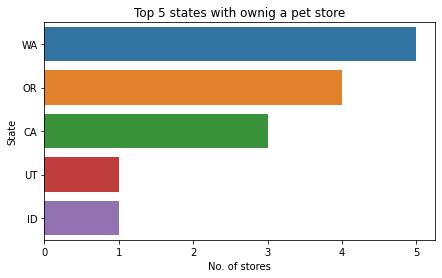

********Pet stores in each state**********


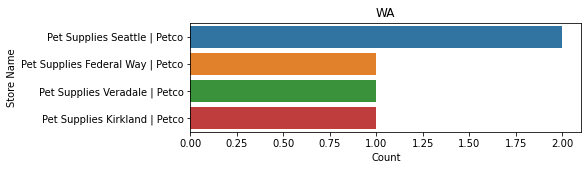

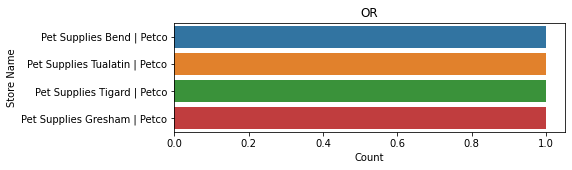

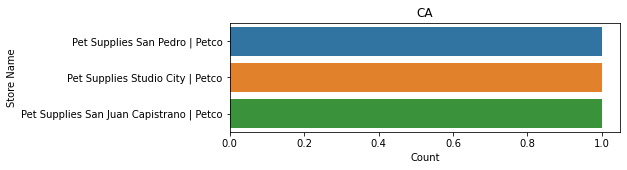

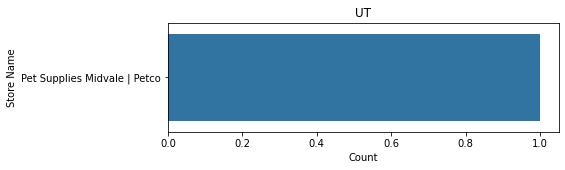

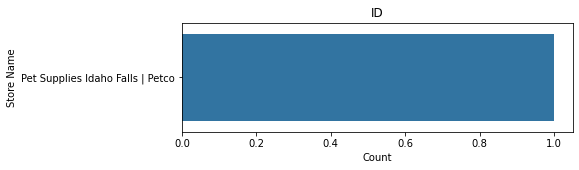

In [35]:
map1=plot_map(df)
plot1(df)
plot2(df)
map1

#### Inferences
The given data consists of 14 pet stores located in the United States of America. Washington is the top state with 5 stores, followed by 4 stores in Oregon. California is the place for 3 pet stores. Idaho and Utah are the states with the least number of stores namely 1. Washington is the only state where there are 2 stores located in the same city. Apart from that, all the stores are unique in its own state.